In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

# Previsão do número de óbitos de COVID no Espírito Santo

In [13]:
df_casos_es_completa = pd.read_csv('C:/Users/Gabriel/Desktop/Projeto_M3//Dados_limpos/casos_full_es_limpa.csv', sep=',')
df_casos_es_completa['date'] = pd.to_datetime(df_casos_es_completa['date'],format='%Y-%m-%d')


In [14]:
#Criação do dataframe para utilização do fb prophet

previsao_obitos = pd.DataFrame()
previsao_obitos['ds'] = df_casos_es_completa['date'][:440]
previsao_obitos['y'] = df_casos_es_completa['new_deaths'][:440]


In [15]:
#Criação do modelo,e da previsao

modelo = Prophet(changepoint_range=0.9, changepoint_prior_scale=0.5, seasonality_mode='multiplicative',  weekly_seasonality=7)
modelo.add_country_holidays(country_name='BR')
modelo.fit(previsao_obitos)
datafranefuturo = modelo.make_future_dataframe(periods=60)
previsao = modelo.predict(datafranefuturo)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
#Criação do dataframe de treino
df_teste_obitos = pd.DataFrame()
df_teste_obitos['ds'] = df_casos_es_completa['date'][440:]
df_teste_obitos['y'] = df_casos_es_completa['new_deaths'][440:]


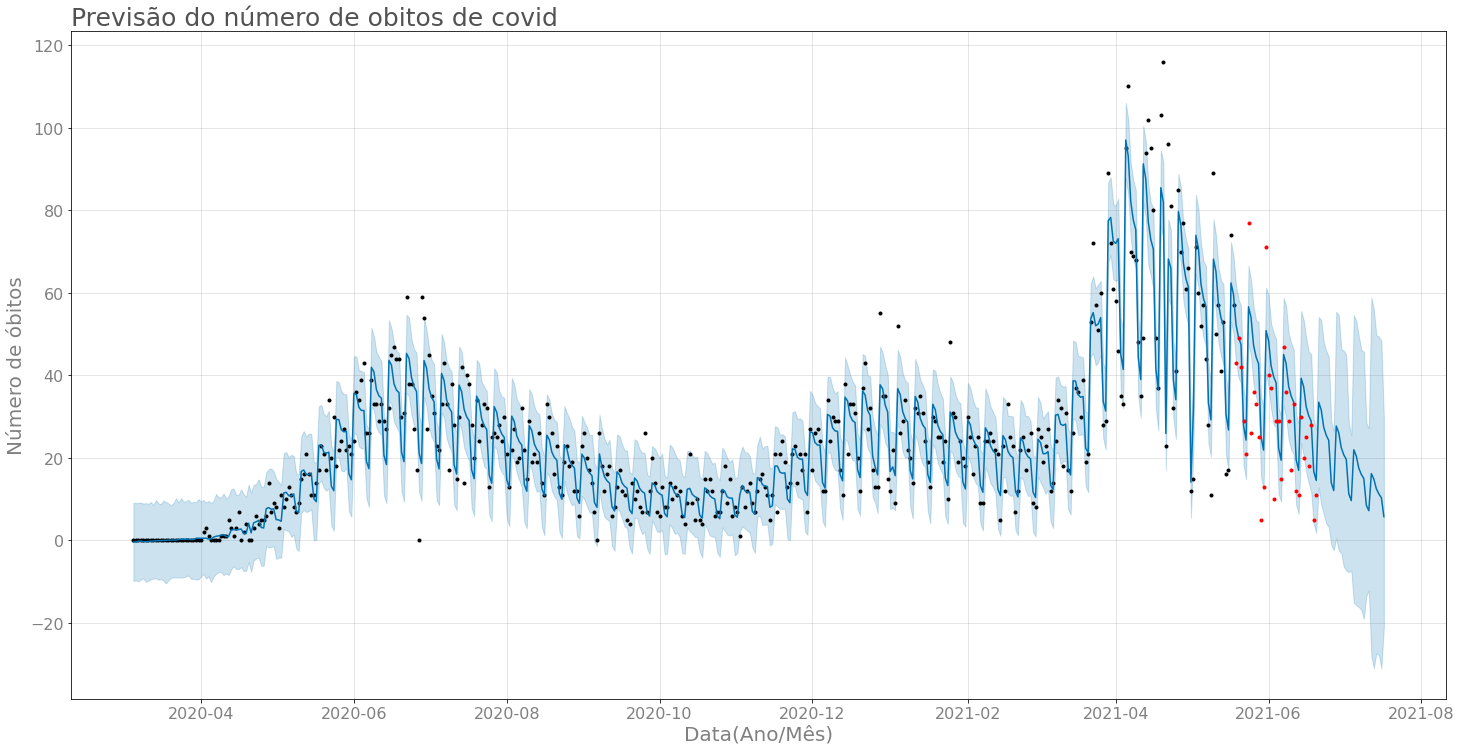

In [17]:
modelo.plot(previsao, xlabel='DataAplicacao', ylabel= 'ES', figsize=(20,10)); 
plt.plot(df_teste_obitos['ds'], df_teste_obitos['y'], '.r')
plt.title('Previsão do número de obitos de covid', loc = 'left', fontsize = 25, color = '#525252')
plt.xticks(fontsize=16, rotation=360, color='#808080')
plt.yticks(fontsize=16, color='#808080')
plt.xlabel('Data(Ano/Mês)', fontsize=20, color='#808080')
plt.ylabel('Número de óbitos', fontsize=20, color='#808080')
plt.show()


Prever como a pandemia vai se comportar é uma tarefa difícil. Diferente de outras doenças já amplamente conhecidas, o comportamento da COVID é imprevisível. Mutações, cepas, sucesso da vacina, desenvolvimento de remédios, medidas de distanciamento e inúmeros outros fatores podem influenciar no futuro da pandemia. 

Desse modo, qualquer previsão de longas datas pode estar sujeita a grandes erros. Desse modo, mantivemos nossas previsão de óbitos próxima de 30 dias. 


## Cross Validation

In [23]:
df_cv = cross_validation(modelo, initial='220 days', period='15 days', horizon = '30 days')

INFO:prophet:Making 13 forecasts with cutoffs between 2020-10-20 00:00:00 and 2021-04-18 00:00:00


Text(0.5, 0, 'ds')

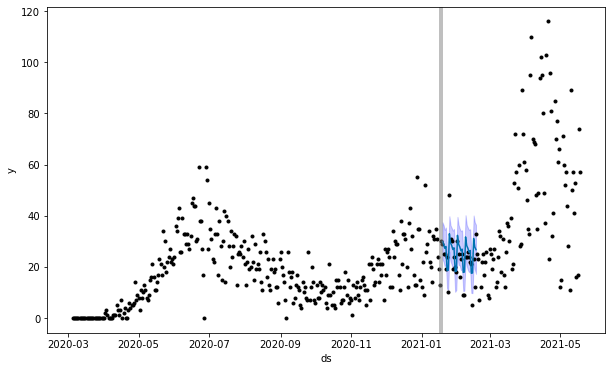

In [28]:
janela = 6
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

#plotando o grafico do cutoff
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

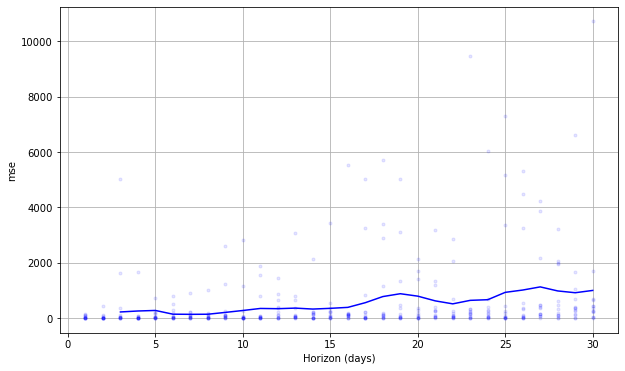

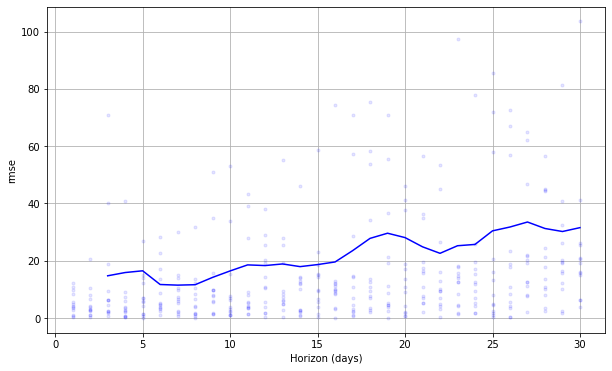

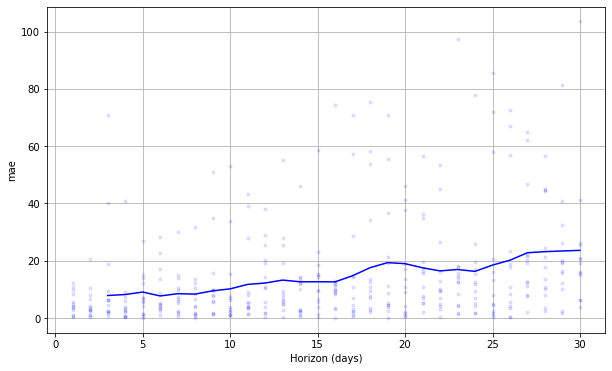

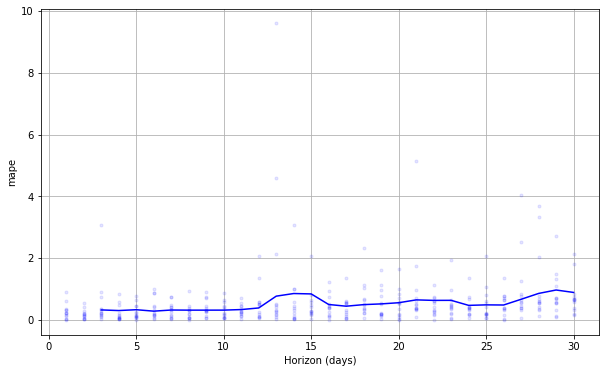

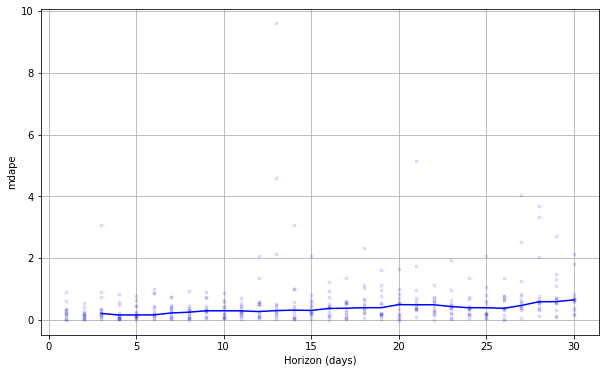

In [29]:
plot_cross_validation_metric(df_cv, metric='mse'); 
plot_cross_validation_metric(df_cv,metric='rmse') 
plot_cross_validation_metric(df_cv, metric='mae'); 
plot_cross_validation_metric(df_cv, metric='mape'); 
plot_cross_validation_metric(df_cv, metric='mdape'); 

A validação demonstra que o erro aumenta com o passar do tempo. Corroborando a ideia de que é difícil produzir um modelo super eficiente de previsão do comportamento da pandemia. Por outro lado, para períodos curtos, o modelo foi eficiente. 